## Import Libraries

In [7]:
# 📦 Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🛠 Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


## Load the CSV File

In [8]:
# Load the Telco Churn dataset
df = pd.read_csv("../data/telco_churn.csv")

# Show shape and preview
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Info

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for Missing Values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Target Variable Distribution

In [13]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# Data Cleaning & Preprocessing

## Fix Data Type Issue (TotalCharges)

In [14]:
# Strip spaces and convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if any values became NaN after conversion
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())


Missing values in TotalCharges: 11


## Handling Missing Values

In [15]:
# Drop rows with missing TotalCharges (only a few)
df = df.dropna(subset=['TotalCharges'])

# Reset index after dropping
df = df.reset_index(drop=True)


## Drop Unnecessary Columns

In [16]:
# Drop customerID as it’s just an identifier
df = df.drop(columns=['customerID'])


##  Identify Categorical Features

In [17]:
# Find object-type columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:\n", cat_cols)


Categorical Columns:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Encode Categorical Variables

In [18]:
# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Check final shape
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded dataset shape: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


## Split dataset into Featuress and Target

In [20]:
# Separate X and y
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shape
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (5625, 30), Testing set: (1407, 30)


## Train a Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7896

Confusion Matrix:
[[917 116]
 [180 194]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Using Logistic Regression Model to Train Dataset

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=10000)  # increased max_iter to ensure convergence

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [25]:
y_prediction = log_reg.predict(X_test)

## Evaluating Model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy_lr = accuracy_score(y_test, y_prediction)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_prediction))


Logistic Regression Accuracy: 0.8045

Confusion Matrix:
[[917 116]
 [159 215]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



## Features Importance

C:\Users\RUKUM\AppData\Local\Temp\ipykernel_3516\2684251984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='coolwarm')


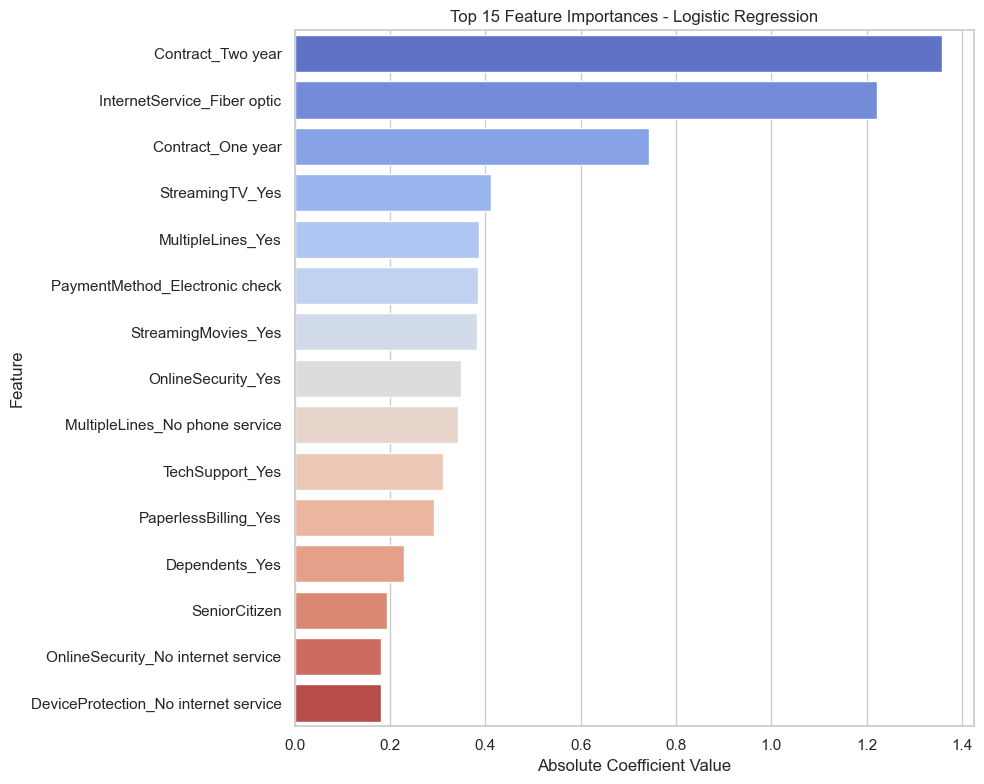

In [27]:
# Get feature importance from coefficients
importance = log_reg.coef_[0]  # only one row since it's binary classification

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': importance,
    'Importance': np.abs(importance)
}).sort_values(by='Importance', ascending=False)

# Plot top 15
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='coolwarm')
plt.title('Top 15 Feature Importances - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
